In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train.dtype

dtype('uint8')

In [5]:
type(x_train)

numpy.ndarray

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [7]:
print(x_train.shape)
print(x_valid.shape)

(54000, 28, 28)
(6000, 28, 28)


In [8]:
x_train = x_train / 255
x_valid = x_valid / 255

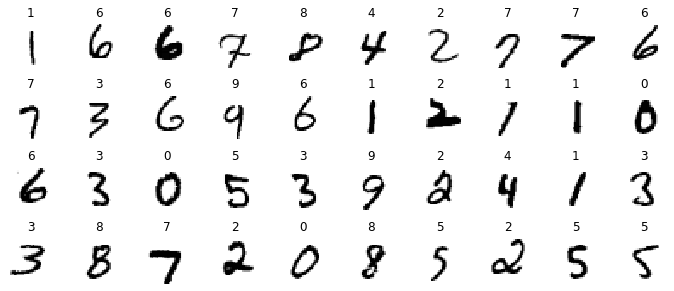

In [9]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.layers

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid))

Epoch 1/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6141 - accuracy: 0.8388 - val_loss: 0.3158 - val_accuracy: 0.9143
Epoch 2/100
1688/1688 [==============================] - 2s 951us/step - loss: 0.2849 - accuracy: 0.9195 - val_loss: 0.2529 - val_accuracy: 0.9288
Epoch 3/100
1688/1688 [==============================] - 2s 948us/step - loss: 0.2342 - accuracy: 0.9336 - val_loss: 0.2139 - val_accuracy: 0.9387
Epoch 4/100
1688/1688 [==============================] - 2s 994us/step - loss: 0.2004 - accuracy: 0.9433 - val_loss: 0.1871 - val_accuracy: 0.9468
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1752 - accuracy: 0.9506 - val_loss: 0.1669 - val_accuracy: 0.9530
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1551 - accuracy: 0.9565 - val_loss: 0.1506 - val_accuracy: 0.9588
Epoch 7/100
1688/1688 [==============================] - 2s 957us/step - loss: 0.1390 - accuracy: 0.9605 - val_loss: 0.1413 

1688/1688 [==============================] - 2s 953us/step - loss: 0.0079 - accuracy: 0.9995 - val_loss: 0.0687 - val_accuracy: 0.9808
Epoch 57/100
1688/1688 [==============================] - 2s 979us/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0715 - val_accuracy: 0.9800
Epoch 58/100
1688/1688 [==============================] - 2s 944us/step - loss: 0.0073 - accuracy: 0.9995 - val_loss: 0.0713 - val_accuracy: 0.9808
Epoch 59/100
1688/1688 [==============================] - 2s 944us/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.0696 - val_accuracy: 0.9812
Epoch 60/100
1688/1688 [==============================] - 2s 922us/step - loss: 0.0068 - accuracy: 0.9996 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 61/100
1688/1688 [==============================] - 2s 949us/step - loss: 0.0065 - accuracy: 0.9997 - val_loss: 0.0715 - val_accuracy: 0.9810
Epoch 62/100
1688/1688 [==============================] - 2s 929us/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 0.0721 

In [15]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 1688}

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 837us/step - loss: 16.7101 - accuracy: 0.9793


[16.710111618041992, 0.9793000221252441]

In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
k = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs):
        self.rates.append(k.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        k.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['accuracy'])
expon_lr = ExponentialLearningRate(factor=1.005)

In [20]:
history = model.fit(x_train, y_train, epochs=1, 
                    validation_data=(x_valid, y_valid), 
                    callbacks=[expon_lr])

1688/1688 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.5865 - val_loss: nan - val_accuracy: 0.1040


Text(0, 0.5, 'Loss')

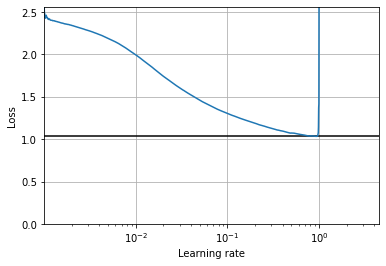

In [21]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),    
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=3e-3), 
              metrics=['accuracy'])

In [24]:
import os

run_index = 1
run_logdir = os.path.join(os.curdir, 'my_logs', 'run_{:03d}'.format(run_index))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist_model.h5', save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [25]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_valid, y_valid), 
                    callbacks=[checkpoint_cb, 
                               early_stopping_cb, 
                               tensorboard_cb])

Epoch 1/100
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1228 - accuracy: 0.7293 - val_loss: 0.5438 - val_accuracy: 0.8648
Epoch 2/100
1688/1688 [==============================] - 2s 939us/step - loss: 0.4501 - accuracy: 0.8816 - val_loss: 0.3882 - val_accuracy: 0.8935
Epoch 3/100
1688/1688 [==============================] - 2s 923us/step - loss: 0.3632 - accuracy: 0.8986 - val_loss: 0.3360 - val_accuracy: 0.9035
Epoch 4/100
1688/1688 [==============================] - 2s 923us/step - loss: 0.3236 - accuracy: 0.9084 - val_loss: 0.3042 - val_accuracy: 0.9115
Epoch 5/100
1688/1688 [==============================] - 2s 939us/step - loss: 0.2973 - accuracy: 0.9158 - val_loss: 0.2841 - val_accuracy: 0.9167
Epoch 6/100
1688/1688 [==============================] - 2s 927us/step - loss: 0.2777 - accuracy: 0.9207 - val_loss: 0.2648 - val_accuracy: 0.9240
Epoch 7/100
1688/1688 [==============================] - 2s 941us/step - loss: 0.2612 - accuracy: 0.9258 - val_loss: 0.2

1688/1688 [==============================] - 2s 937us/step - loss: 0.0595 - accuracy: 0.9841 - val_loss: 0.0887 - val_accuracy: 0.9742
Epoch 57/100
1688/1688 [==============================] - 2s 938us/step - loss: 0.0583 - accuracy: 0.9842 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 58/100
1688/1688 [==============================] - 2s 929us/step - loss: 0.0569 - accuracy: 0.9851 - val_loss: 0.0887 - val_accuracy: 0.9747
Epoch 59/100
1688/1688 [==============================] - 2s 932us/step - loss: 0.0560 - accuracy: 0.9853 - val_loss: 0.0872 - val_accuracy: 0.9743
Epoch 60/100
1688/1688 [==============================] - 2s 930us/step - loss: 0.0549 - accuracy: 0.9856 - val_loss: 0.0873 - val_accuracy: 0.9745
Epoch 61/100
1688/1688 [==============================] - 2s 938us/step - loss: 0.0538 - accuracy: 0.9858 - val_loss: 0.0840 - val_accuracy: 0.9762
Epoch 62/100
1688/1688 [==============================] - 2s 944us/step - loss: 0.0527 - accuracy: 0.9859 - val_loss: 0.0856 

In [26]:
model = keras.models.load_model('mnist_model.h5')
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 577us/step - loss: 12.6264 - accuracy: 0.9758


[12.62642765045166, 0.9757999777793884]

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
def create_model(optimizer=keras.optimizers.SGD, learning_rate=3e-3):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer(learning_rate=learning_rate), 
              metrics=['accuracy'])
    return model

In [29]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(create_model)

In [30]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer': [
        keras.optimizers.SGD,
        keras.optimizers.Adam,
        keras.optimizers.RMSprop,
    ],
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, params, n_iter=10, scoring='accuracy',
                                   cv=3, verbose=2, n_jobs=-1)

In [31]:
rnd_search_cv.fit(x_train, y_train, epochs=100, 
                  validation_data=(x_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 10.7min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.1min finished


Epoch 1/100
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2414 - accuracy: 0.9290 - val_loss: 0.1133 - val_accuracy: 0.9645
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0988 - accuracy: 0.9711 - val_loss: 0.0912 - val_accuracy: 0.9730
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0706 - accuracy: 0.9790 - val_loss: 0.0798 - val_accuracy: 0.9772
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0564 - accuracy: 0.9836 - val_loss: 0.0798 - val_accuracy: 0.9787
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0448 - accuracy: 0.9873 - val_loss: 0.0894 - val_accuracy: 0.9790
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0360 - accuracy: 0.9899 - val_loss: 0.0831 - val_accuracy: 0.9820
Epoch 7/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0291 - accuracy: 0.9920 - val_loss: 0.0992 - val_ac

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F3FB55C648>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F3FB55D5C8>,
                                        'optimizer': [<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>,
                                                      <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>,
                                                      <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>]},
                   scoring='accuracy', verbose=2)

In [32]:
rnd_search_cv.best_params_

{'learning_rate': 0.0006153331256530192,
 'optimizer': tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop}

In [33]:
rnd_search_cv.best_score_

0.975

In [34]:
rnd_search_cv.best_estimator_

In [35]:
model = rnd_search_cv.best_estimator_.model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 840us/step - loss: 30.5497 - accuracy: 0.9816


[30.54974937438965, 0.9815999865531921]

In [36]:
model.save("mnist_model.h5")